In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('abalone.csv',sep=",",header=None)
data

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
data.columns=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

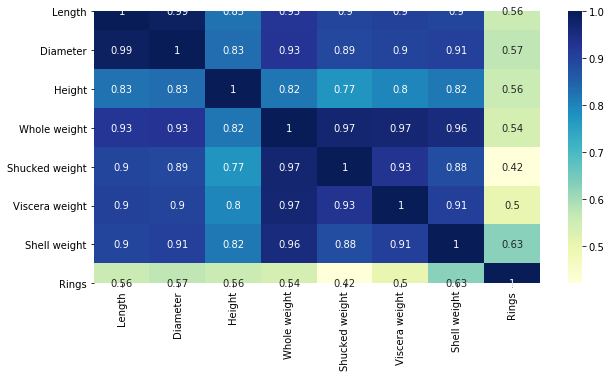

In [6]:
# Analyzing the relation between the independent and variables in the dataset.
corr = data[data.columns].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, cmap="YlGnBu", annot = True)
# Most of the varibales have a high correlation

In [7]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


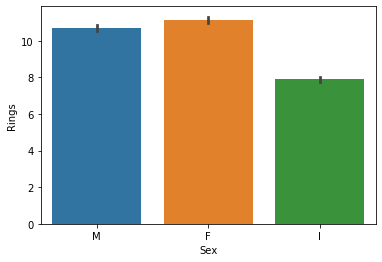

In [8]:
# Analyzing the number of rings and sex
sns.barplot(x='Sex',y='Rings', data=data)
# Abalones with average age of more than 10 years are either Male or Female

In [9]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
data['Sex']= le.fit_transform(data['Sex']) 

In [10]:
# Splitting the data into dependent and independent variables
x=data.iloc[:,0:7]
y=data.iloc[:,-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395
...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610


In [11]:
df_x=x.iloc[:,1:7]
df_y=x.iloc[:,0]
df_x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010
1,0.350,0.265,0.090,0.2255,0.0995,0.0485
2,0.530,0.420,0.135,0.6770,0.2565,0.1415
3,0.440,0.365,0.125,0.5160,0.2155,0.1140
4,0.330,0.255,0.080,0.2050,0.0895,0.0395
...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610


In [12]:
le=LabelEncoder()
le.fit(df_y)
df_y=le.transform(df_y)
df_y

array([2, 2, 0, ..., 2, 0, 2], dtype=int64)

In [13]:
df_x['Sex']=df_y
df_x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Sex
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,1
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0


In [14]:
df_x.skew()
# There is a high degree of skewness in the height data

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Sex              -0.098155
dtype: float64

In [15]:
df_x['Length']=np.square(df_x['Length'])
df_x['Diameter']=np.square(df_x['Diameter'])
df_x['Height']=np.log1p(df_x['Height'])
df_x['Height']=np.log1p(df_x['Height'])
df_x['Whole weight']=np.log1p(df_x['Whole weight'])
df_x['Shucked weight']=np.log1p(df_x['Shucked weight'])
df_x['Viscera weight']=np.log1p(df_x['Viscera weight'])

In [16]:
df_x.skew()

Length           -0.068660
Diameter         -0.026554
Height            0.351391
Whole weight     -0.038066
Shucked weight    0.306439
Viscera weight    0.375637
Sex              -0.098155
dtype: float64

In [17]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [18]:
y.skew()

1.114101898355677

In [19]:
y=np.log1p(y)

In [20]:
y.skew()

-0.06131738957117989

In [37]:
# Using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
hyperparametersdtr={'criterion':['mse','mae'],'max_depth':range(1,2)}
griddtr=GridSearchCV(dtr, hyperparametersdtr, cv=5, scoring='r2')
griddtr.fit(x,y)
print(griddtr.best_params_)

{'criterion': 'mse', 'max_depth': 1}


In [38]:
dtr=DecisionTreeRegressor('mse',max_depth=1)
df_x_train, df_x_test, y_train, y_test = train_test_split(df_x,y,random_state=42,test_size=.20)
dtr.fit(df_x_train,y_train)
predicty=dtr.predict(df_x_test)
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,predicty)))
print("r2_score is: ",r2_score(y_test,predicty))

RMSE is:  0.23757456425001733
r2_score is:  0.3375365982757904


In [39]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for r2 score is:', cross_val_score(dtr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score is: ",cross_val_score(dtr,x,y,cv=5,scoring="r2").std())

Mean cross validation score for r2 score is: 0.2022932070477293
Standard deviation in r2 score is:  0.13651509461429626


In [42]:
# Using KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
k_range = list(range(1,18))
hyperparametersknr=dict(n_neighbors=k_range)
gridknr=GridSearchCV(knr, hyperparametersknr, cv=5, scoring='r2')
gridknr.fit(x,y)
print(gridknr.best_params_)

{'n_neighbors': 13}


In [43]:
knr=KNeighborsRegressor(n_neighbors=13)
df_x_train, df_x_test, y_train, y_test = train_test_split(df_x,y,random_state=42,test_size=.20)
knr.fit(df_x_train,y_train)
predicty=knr.predict(df_x_test)
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,predicty)))
print("r2_score is: ",r2_score(y_test,predicty))

RMSE is:  0.1766177849508693
r2_score is:  0.6338737434933237


In [44]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for r2 score is:', cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score is: ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean cross validation score for r2 score is: 0.5559420745876966
Standard deviation in r2 score is:  0.05464450783116887


In [49]:
# Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
hyperparametersrfr={'n_estimators':[10,100,250]}
gridrfr=GridSearchCV(rfr, hyperparametersrfr, cv=5, scoring='r2')
gridrfr.fit(x,y)
print(gridrfr.best_params_)

{'n_estimators': 250}


In [50]:
rfr=RandomForestRegressor(n_estimators=250)
df_x_train, df_x_test, y_train, y_test = train_test_split(df_x,y,random_state=42,test_size=.20)
rfr.fit(df_x_train,y_train)
predicty=rfr.predict(df_x_test)
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,predicty)))
print("r2_score is: ",r2_score(y_test,predicty))

RMSE is:  0.17794073963947782
r2_score is:  0.6283682670477377


In [51]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for r2 score is:', cross_val_score(rfr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score is: ",cross_val_score(rfr,x,y,cv=5,scoring="r2").std())

Mean cross validation score for r2 score is: 0.5504773125438873
Standard deviation in r2 score is:  0.06530488057353821


In [54]:
# Among all the models, KNN Regressor model is the best performing model
# Saving the KNN Regressor model
from sklearn.externals import joblib 
joblib.dump(knr, 'Abalone_knr.pkl')

['Abalone_knr.pkl']